In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import h5py
root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

import torch
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torch.utils.data import Subset

from predify.utils.training import train_pcoders, eval_pcoders

from networks_2022 import BranchedNetwork
from data.CleanSoundsDataset import CleanSoundsDataset
from data.NoisyDataset import NoisyDataset, LargeNoisyDataset

# Parameters

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'
checkpoints_dir = f'{engram_dir}checkpoints/'
tensorboard_dir = f'{engram_dir}tensorboard/'
activations_dir = f'{engram_dir}activations_pnet/'

In [3]:
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Device: {DEVICE}')

Device: cpu


# Reconstruction function

In [4]:
def plot_reconstructions(results, dset):
    n_timesteps = 5

    for i in range(5):
        fig, axs = plt.subplots(n_timesteps, 1, figsize = (6,10))
        clean_input = dset.clean_in[i]
        label = results['label'][i]
        for t in range(n_timesteps):
            reconstruction = results[f'{t}_reconstructions'][i]
            output = results[f'{t}_output'][i]
            corr, _ = pearsonr(reconstruction.flatten(), clean_input)
            axs[t].imshow(reconstruction)
            axs[t].set_title(f't = {t+1}, corr = {corr:.3f}, pred = {output}')
        for ax in axs:
            ax.set_xticks([])
            ax.set_yticks([])
        plt.suptitle(f'Reconstruction, Correct label {label}', fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Reconstructions for Auditory Scene

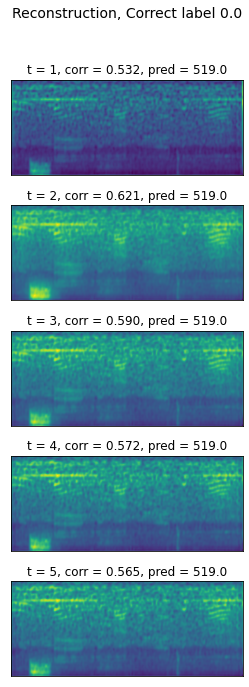

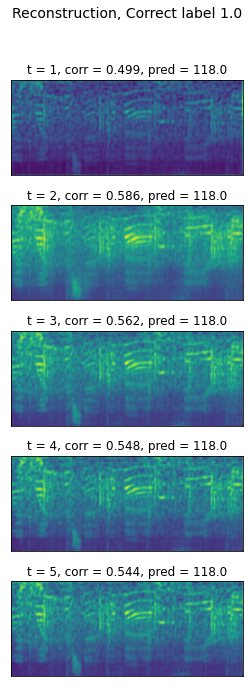

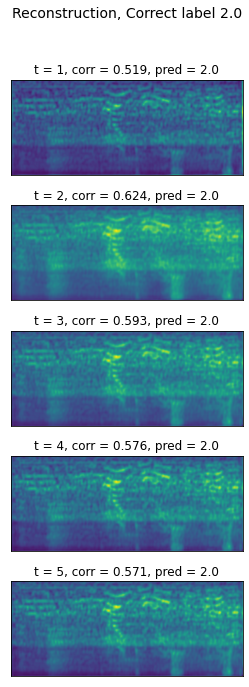

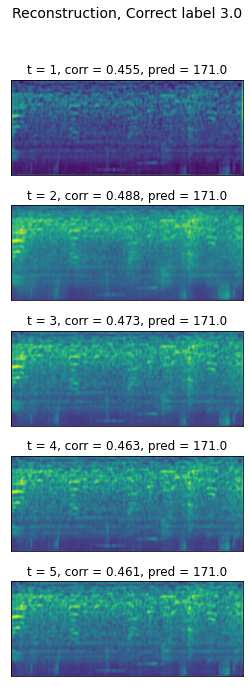

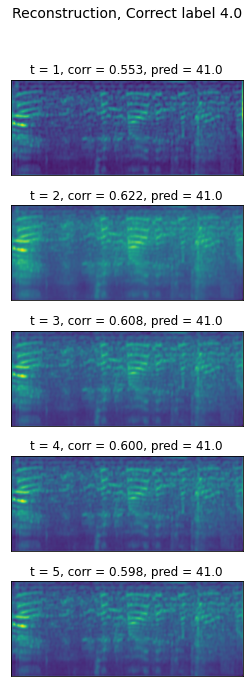

In [5]:
bg = 'AudScene'
snr = -3
results_path = f'{activations_dir}{bg}_snr{int(snr)}.hdf5'
results = h5py.File(results_path, 'r')
dset = NoisyDataset(bg, snr)

plot_reconstructions(results, dset)